In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as col
import math
import pandas as pd
import time

from astropy.io import fits
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
from math import pi

In [2]:
def ring(data, pixel_size, center_x, center_y, file_count):

    r_vals = []
    
    r_dict_I = {}
    r_dict_pix = {}
    tic = time.perf_counter()
    y_len = len(data)
    x_len = len(data[1])
    
    
    #delta = round(center_x/35) + 1
    #print(delta)
    

    for y in range(y_len):
        
        for x in range(x_len):

            I = data[y, x]
            

            rx = abs(center_x - x)
            ry = abs(center_y - y)
            r = round(math.sqrt(rx**2 + ry**2))
            r = int(r)


            if r in r_vals:
                #cur_I_sum = r_dict_I[r]
                r_dict_I[r] += I

                #cur_pix_sum = r_dict_pix[r]
                r_dict_pix[r] += 1


            else:
                r_vals.append(r)

                r_dict_I[r] = I


                r_dict_pix[r] = 1

    r_dict_I_sort = sorted(r_dict_I.keys())
    
    r_lst = []
    cul_vals = []
    I_vals = []
    moving_sum = 0
    
   
    for key in r_dict_I_sort:
        if r_dict_I[key] != 0:
            r_cm = pixel_size * key
            r_kpc = round((r_cm * 3.24077928967e-19) / 1e3, 4)

            r_lst.append(r_kpc)
            I_pix = r_dict_I[key] / r_dict_pix[key]
            moving_sum += I_pix
            cul_vals.append(moving_sum)
            I_vals.append(I_pix)
    
        
    max_val = cul_vals[-1]
    norm_cul_vals = []
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
    
    mean = np.mean(I_vals)

   # if file_count < 7:
        
    
    
    # plt.bar(r_lst, norm_cul_vals, width=0.5)
    # plt.plot(r_lst, norm_cul_vals)
    # plt.title("Normalized Cumulative Histogram of Jet Intensities Radially")
    # plt.xlabel("R-Value (kpc)")
    # plt.ylabel("Normalized Cumulative Value")
    # plt.show()
    
    
    max_I = max(I_vals)
    max_r_in = I_vals.index(max_I)
    max_r = r_lst[max_r_in]
    
    if round(max_r) == 0:
        
        for value in r_lst:
            if value > 15:
                br = r_lst.index(value)
                break
            else:
                br = 0
                
        max_I = max(I_vals[br:])
        max_r_in = I_vals.index(max_I)
        max_r = r_lst[max_r_in]
        
        print(max_I)
        print(max_r)
        
        plt.plot(r_lst[br:], I_vals[br:])
        plt.axhline(y=mean, color='r', linestyle='dashed')
        plt.title("Jet Intensities Radially")
        plt.xlabel("R-Value (kpc)")
        plt.ylabel("Intensity Value")
        plt.show()
        
    else:
        plt.plot(r_lst, I_vals)
        plt.title("Jet Intensities Radially")
        plt.axhline(y=mean, color='r', linestyle='dashed')
        plt.xlabel("R-Value (kpc)")
        plt.ylabel("Intensity Value")
        plt.show()
        
        print(max_I)
        print(max_r)
    
                
        
        
        
        # 1. Create an array with outliers
        # 2. Determine mean and standard deviation
#         mean = np.mean(I_vals)
# #         std_dev = np.std(I_vals)
# #         # 3. Normalize array around 0
# #         zero_based = abs(I_vals - mean)
# #         # 4. Define maximum number of standard deviations
# #         max_deviations = 0.5



#         no_outliers = []

# #         for i, element in enumerate(zero_based):
# #             if element < max_deviations * std_dev:
# #                 no_outliers.append(I_vals[i])
# #             else:
# #                 no_outliers.append(0)
#         for element in I_vals:
#             if element > mean:
#                 no_outliers.append(np.nan)
#             else:
#                 no_outliers.append(element)
                

#         plt.plot(r_lst, no_outliers)
#         plt.axhline(y=mean, color='r', linestyle='dashed')
#         plt.title("Jet Intensities Radially")
#         plt.xlabel("R-Value (kpc)")
#         plt.ylabel("Intensity Value")
#         plt.show()

    # pixel_count = 0
    # for element in norm_cul_vals:
    #     if element >= 0.02 and element <= 0.98:
    #         pixel_count += 1
            
    # jet_r_cm = pixel_size * pixel_count
    # jet_r_kpc = round((jet_r_cm * 3.24077928967e-19) / 1e3, 4)
    #print("\nTotal Radius (96%): {} kpc".format(jet_r_kpc))
    
    toc = time.perf_counter()
    print("\nCompleted in {} seconds".format(round(toc - tic)))
    
    return_lst = [max_r, max_I]
    
    return return_lst
    
        
    


JET RING DETERMINING PROGRAM:
____________________________________________________________________________________________________

File Number 1/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 1.0 Myr - 30 MHz


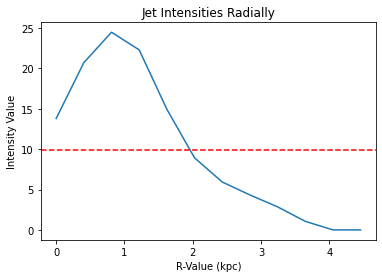

24.487193255618113
0.8102

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 2/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 2.0 Myr - 30 MHz


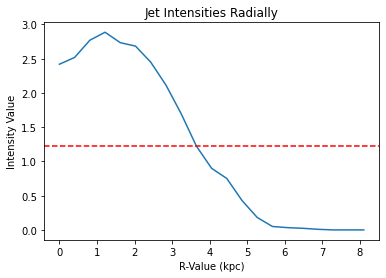

2.8859413975504076
1.2153

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 3/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 4.0 Myr - 30 MHz


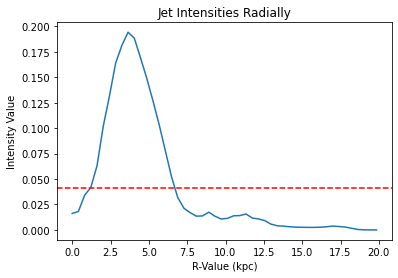

0.1942207800746649
3.6459

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 4/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 8.0 Myr - 30 MHz


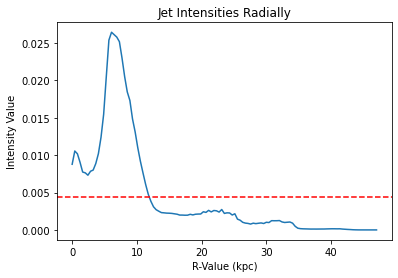

0.02641830065801582
6.0765

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 5/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 13.1 Myr - 30 MHz


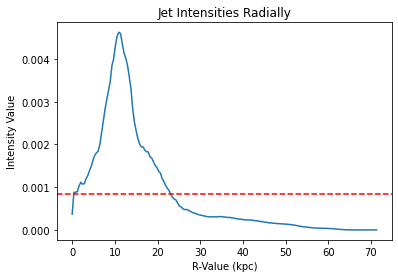

0.0046269391352102745
10.9376

Completed in 1 seconds
____________________________________________________________________________________________________

File Number 6/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 18.1 Myr - 30 MHz
0.0005505001175702745
15.3937


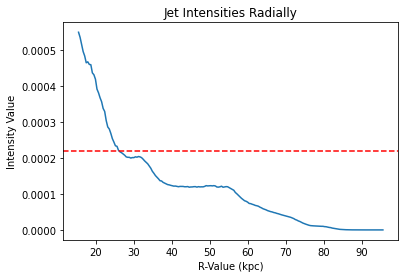


Completed in 2 seconds
____________________________________________________________________________________________________

File Number 7/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 33.1 Myr - 30 MHz
3.265736794209975e-05
22.6855


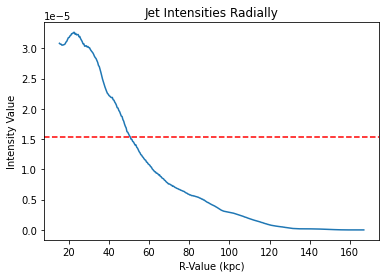


Completed in 14 seconds
____________________________________________________________________________________________________

File Number 8/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 63.0 Myr - 30 MHz
1.5870218562033043e-06
34.0282


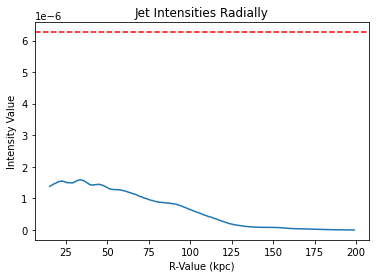


Completed in 23 seconds
____________________________________________________________________________________________________

File Number 9/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 127.9 Myr - 30 MHz
3.814146229843879e-07
36.8639


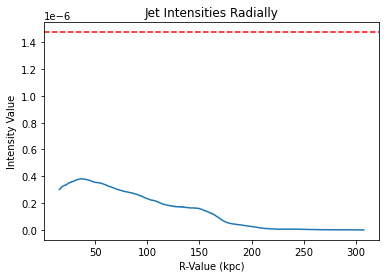


Completed in 89 seconds
____________________________________________________________________________________________________

File Number 10/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 257.7 Myr - 30 MHz


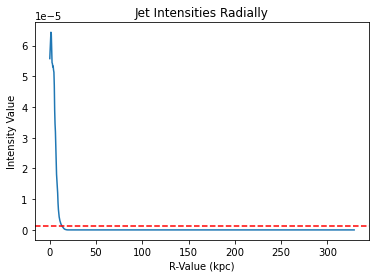

6.43524358561239e-05
1.2153

Completed in 104 seconds
____________________________________________________________________________________________________

File Number 11/11

Simulation Title: Simulation Group_L446_rc3_beta07 - 472.3 Myr - 30 MHz


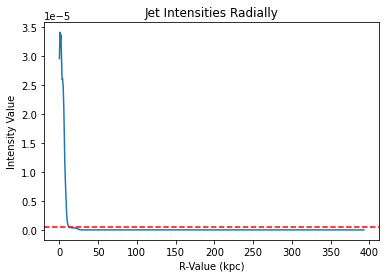

3.407332529789312e-05
0.8102

Completed in 204 seconds
____________________________________________________________________________________________________

      0      1                  2                       3
0    rc   Time  Ring Radius (kpc)  Maximum Ring Intensity
1   3.0    1.0             0.8102      24.487193255618113
2   3.0    2.0             1.2153      2.8859413975504076
3   3.0    4.0             3.6459      0.1942207800746649
4   3.0    8.0             6.0765     0.02641830065801582
5   3.0   13.1            10.9376   0.0046269391352102745
6   3.0   18.1            15.3937   0.0005505001175702745
7   3.0   33.1            22.6855   3.265736794209975e-05
8   3.0   63.0            34.0282  1.5870218562033043e-06
9   3.0  127.9            36.8639   3.814146229843879e-07
10  3.0  257.7             1.2153    6.43524358561239e-05
11  3.0  472.3             0.8102   3.407332529789312e-05
File Number 1/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 1.0 Myr - 30 MHz


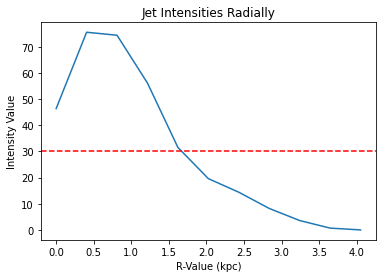


Completed in 0 seconds
____________________________________________________________________________________________________

File Number 2/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 2.0 Myr - 30 MHz


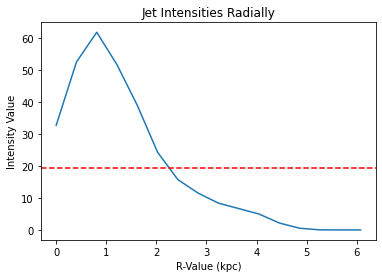

61.700849125361096
0.8102

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 3/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 4.0 Myr - 30 MHz


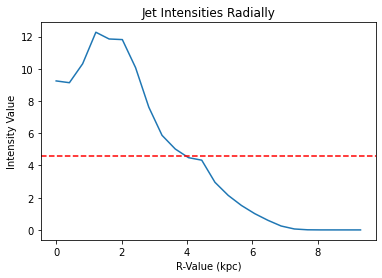

12.267058329874532
1.2153

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 4/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 8.0 Myr - 30 MHz


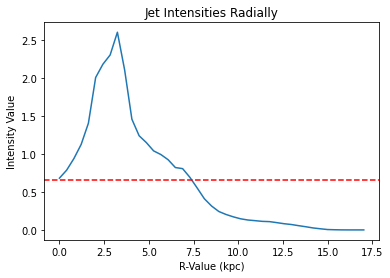

2.60682329803287
3.2408

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 5/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 16.0 Myr - 30 MHz


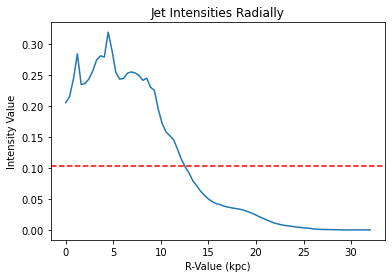

0.3190768261606554
4.4561

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 6/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 32.0 Myr - 30 MHz


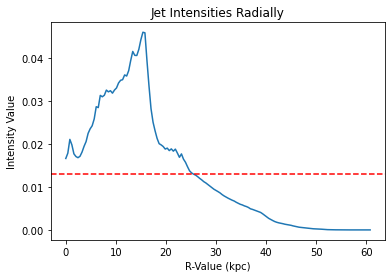

0.04591896262171913
15.3937

Completed in 1 seconds
____________________________________________________________________________________________________

File Number 7/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 64.0 Myr - 30 MHz
0.001465143078780637
27.1415


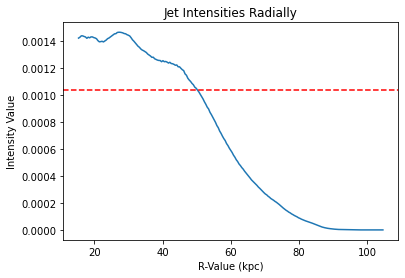


Completed in 5 seconds
____________________________________________________________________________________________________

File Number 8/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 79.1 Myr - 30 MHz


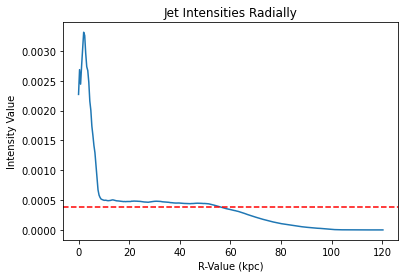

0.0033149336131197255
2.0255

Completed in 8 seconds
____________________________________________________________________________________________________

File Number 9/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 128.1 Myr - 30 MHz


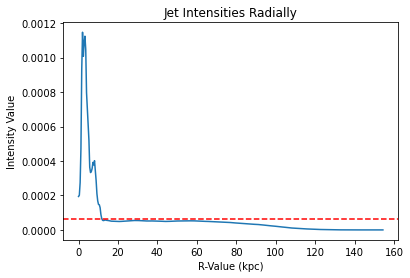

0.0011469084613327115
2.0255

Completed in 18 seconds
____________________________________________________________________________________________________

File Number 10/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 260.1 Myr - 30 MHz


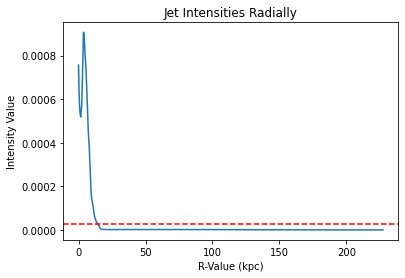

0.0009073109847900741
3.6459

Completed in 50 seconds
____________________________________________________________________________________________________

File Number 11/11

Simulation Title: Simulation Group_L446_rc10_beta07 - 470.2 Myr - 30 MHz
0.00013155396974605596
15.3937


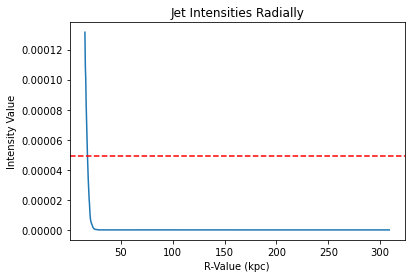


Completed in 97 seconds
____________________________________________________________________________________________________

       0      1                  2                       3
0     rc   Time  Ring Radius (kpc)  Maximum Ring Intensity
1   10.0    1.0             0.4051       75.59549987281846
2   10.0    2.0             0.8102      61.700849125361096
3   10.0    4.0             1.2153      12.267058329874532
4   10.0    8.0             3.2408        2.60682329803287
5   10.0   16.0             4.4561      0.3190768261606554
6   10.0   32.0            15.3937     0.04591896262171913
7   10.0   64.0            27.1415    0.001465143078780637
8   10.0   79.1             2.0255   0.0033149336131197255
9   10.0  128.1             2.0255   0.0011469084613327115
10  10.0  260.1             3.6459   0.0009073109847900741
11  10.0  470.2            15.3937  0.00013155396974605596
File Number 1/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 1.0 Myr - 30 MHz
97.45620030409877

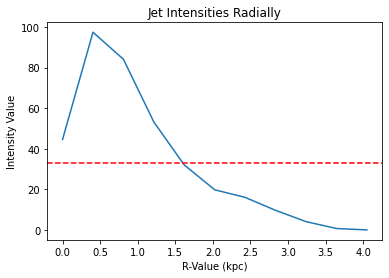


Completed in 0 seconds
____________________________________________________________________________________________________

File Number 2/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 2.0 Myr - 30 MHz
64.47899858194381
0.4051


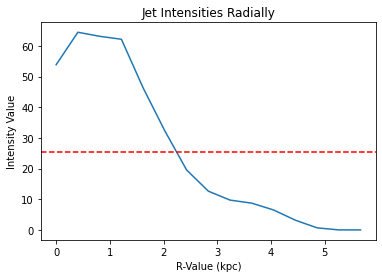


Completed in 0 seconds
____________________________________________________________________________________________________

File Number 3/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 4.0 Myr - 30 MHz


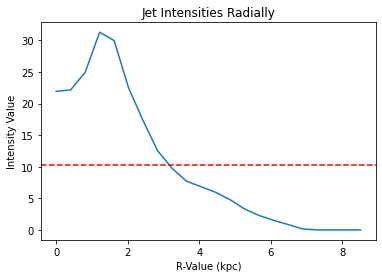

31.30320278956036
1.2153

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 4/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 8.0 Myr - 30 MHz


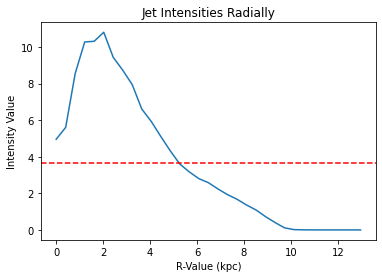

10.80171286371866
2.0255

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 5/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 16.0 Myr - 30 MHz


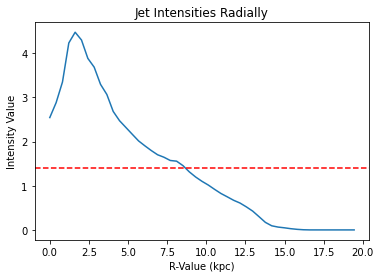

4.476921123966591
1.6204

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 6/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 32.0 Myr - 30 MHz


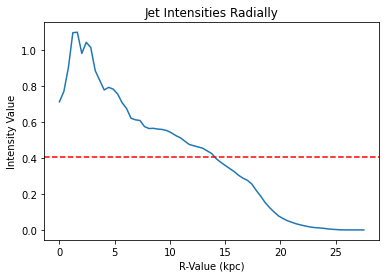

1.1006763430745052
1.6204

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 7/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 64.0 Myr - 30 MHz


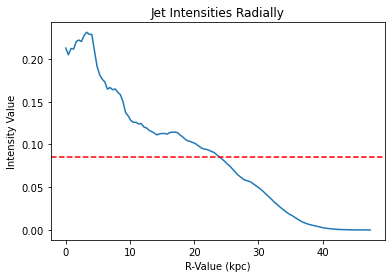

0.23128329190305716
3.2408

Completed in 1 seconds
____________________________________________________________________________________________________

File Number 8/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 121.2 Myr - 30 MHz


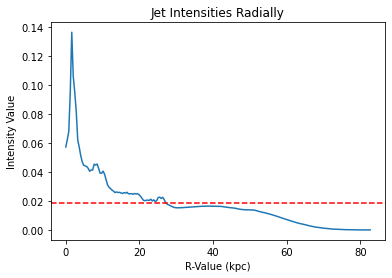

0.13624411687221744
1.6204

Completed in 2 seconds
____________________________________________________________________________________________________

File Number 9/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 256.1 Myr - 30 MHz


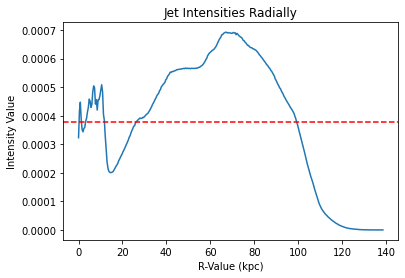

0.000692201108801365
67.2462

Completed in 11 seconds
____________________________________________________________________________________________________

File Number 10/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 513.1 Myr - 30 MHz


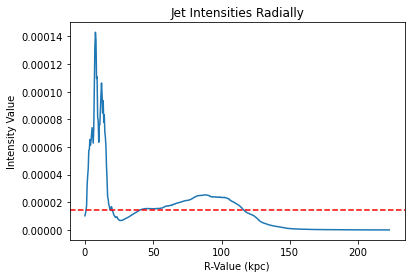

0.00014301525867928307
7.6969

Completed in 30 seconds
____________________________________________________________________________________________________

File Number 11/11

Simulation Title: Simulation Group_L446_rc30_beta07 - 773.1 Myr - 30 MHz


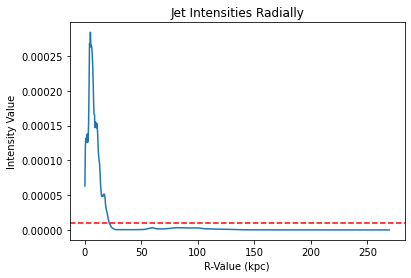

0.00028413031806657796
4.8612

Completed in 51 seconds
____________________________________________________________________________________________________

       0      1                  2                       3
0     rc   Time  Ring Radius (kpc)  Maximum Ring Intensity
1   30.0    1.0             0.4051       97.45620030409877
2   30.0    2.0             0.4051       64.47899858194381
3   30.0    4.0             1.2153       31.30320278956036
4   30.0    8.0             2.0255       10.80171286371866
5   30.0   16.0             1.6204       4.476921123966591
6   30.0   32.0             1.6204      1.1006763430745052
7   30.0   64.0             3.2408     0.23128329190305716
8   30.0  121.2             1.6204     0.13624411687221744
9   30.0  256.1            67.2462    0.000692201108801365
10  30.0  513.1             7.6969  0.00014301525867928307
11  30.0  773.1             4.8612  0.00028413031806657796
File Number 1/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 1.0

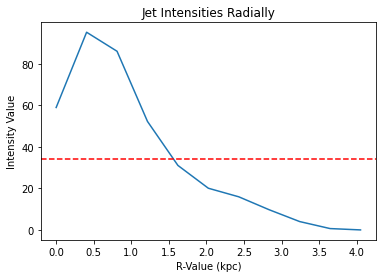


Completed in 0 seconds
____________________________________________________________________________________________________

File Number 2/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 2.0 Myr - 30 MHz


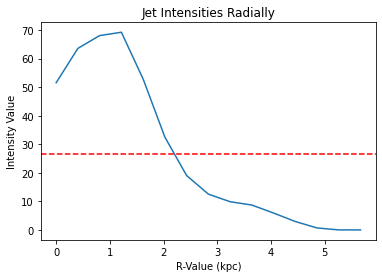

69.22170739219271
1.2153

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 3/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 4.0 Myr - 30 MHz


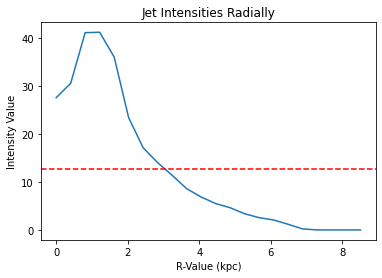

41.15630465996294
1.2153

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 4/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 8.0 Myr - 30 MHz


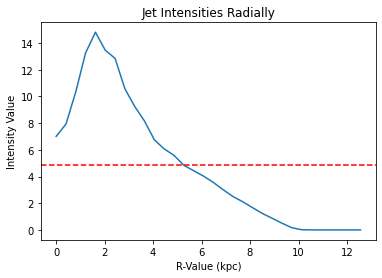

14.815154595719148
1.6204

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 5/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 16.0 Myr - 30 MHz


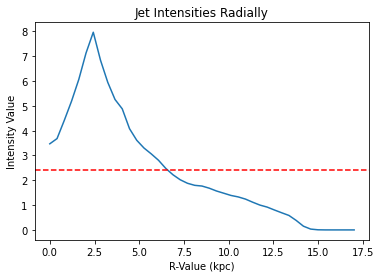

7.96636883520557
2.4306

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 6/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 32.0 Myr - 30 MHz


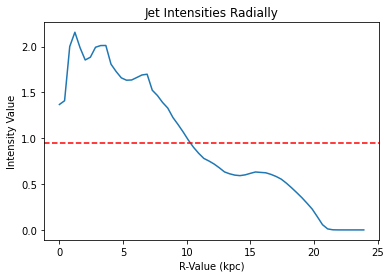

2.155736178569505
1.2153

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 7/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 64.0 Myr - 30 MHz
0.3912186491401521
15.3937


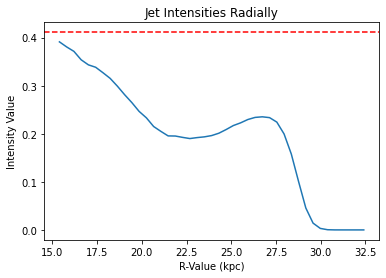


Completed in 0 seconds
____________________________________________________________________________________________________

File Number 8/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 128.0 Myr - 30 MHz


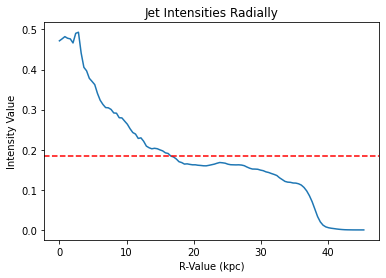

0.4929102519073667
2.8357

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 9/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 256.0 Myr - 30 MHz


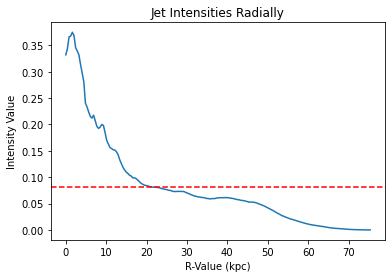

0.3750320309622127
1.6204

Completed in 2 seconds
____________________________________________________________________________________________________

File Number 10/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 384.0 Myr - 30 MHz


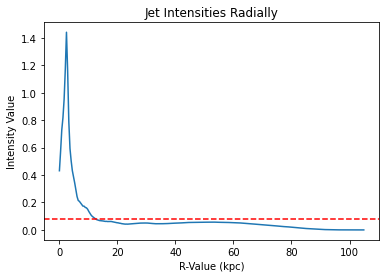

1.4403970736951757
2.4306

Completed in 3 seconds
____________________________________________________________________________________________________

File Number 11/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 512.1 Myr - 30 MHz


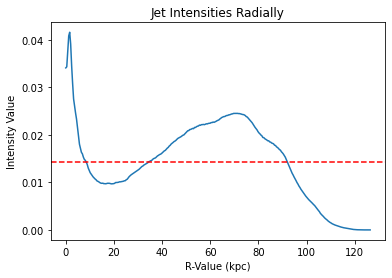

0.041593412013837074
1.6204

Completed in 6 seconds
____________________________________________________________________________________________________

File Number 12/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 998.1 Myr - 30 MHz


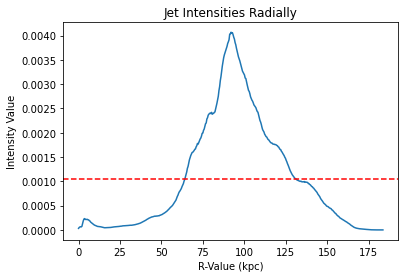

0.004067894016878902
91.9571

Completed in 22 seconds
____________________________________________________________________________________________________

        0      1                  2                       3
0      rc   Time  Ring Radius (kpc)  Maximum Ring Intensity
1   100.0    1.0             0.4051       95.13658441873206
2   100.0    2.0             1.2153       69.22170739219271
3   100.0    4.0             1.2153       41.15630465996294
4   100.0    8.0             1.6204      14.815154595719148
5   100.0   16.0             2.4306        7.96636883520557
6   100.0   32.0             1.2153       2.155736178569505
7   100.0   64.0            15.3937      0.3912186491401521
8   100.0  128.0             2.8357      0.4929102519073667
9   100.0  256.0             1.6204      0.3750320309622127
10  100.0  384.0             2.4306      1.4403970736951757
11  100.0  512.1             1.6204    0.041593412013837074
12  100.0  998.1            91.9571    0.004067894016878902


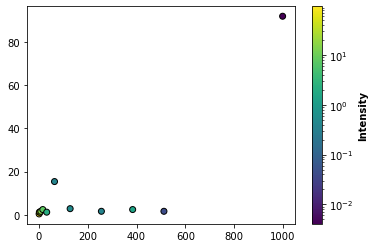

In [3]:
#Main Calling Block of Code

print("\nJET RING DETERMINING PROGRAM:")
print("{}\n".format("_"*100))
rc = [3, 10, 30, 100]

ring_r_mlst = []
ring_I_mlst = []
ring_t_mlst = []

for value in rc:
    ring_data = np.array([["rc", "Time", "Ring Radius (kpc)", "Maximum Ring Intensity"]])
    path = '**/Group_L446_rc{}_*nu=30.0*0.00_0.00_1.00*Myr.fits*'.format(value)

    # Determines if there are any files in device
    total_files = len(glob.glob(path, recursive=True))

    if total_files > 0:
        file_count = 0
        for file in sorted(glob.glob(path, recursive=True)):

            file_count += 1

            try:
                print("File Number {}/{}\n".format(file_count, total_files))
                #print("File Name: {}".format(file))

                image_data = fits.getdata(file, ext=0)
                fits_image_hdul = fits.open(file)

                #Displays FITS Image title, time index, and pixel size
                sim_title = fits_image_hdul[0].header['OBJECT']
                sim_time = fits_image_hdul[0].header['TIME']
                sim_time = round(float(sim_time[:-4]), 1)
                
                pixel = fits_image_hdul[0].header['CDELT1']
                print("Simulation Title: {}".format(sim_title))
                #print("Time index: {}".format(sim_time))
                #print("Pixel size: {}".format(pixel))
                pixel_size = float(pixel[:-3])

                center_x = round(float(fits_image_hdul[0].header['CRPIX1']))
                center_y = round(float(fits_image_hdul[0].header['CRPIX2']))
                center = (center_x, center_y)
                #print("Center of fits image: {}".format(center))

                #Difines Data From FITS image and records image dimensions
                data =  fits_image_hdul[0].data
                length = len(data[0])
                width = len(data)
                #print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))

#                 for i in range(image_data.shape[0]):
#                     for j in range(image_data.shape[1]):
#                         if image_data[i, j] == 0:
#                             image_data[i, j] = 1e-12


#                 plt.figure()
#                 plt.imshow(image_data, cmap='hot', norm=col.LogNorm())
#                 plt.clim(10e-11, 1e2) 
#                 plt.colorbar() 
#                 plt.show()

                return_lst = ring(data, pixel_size, center_x, center_y, file_count)
                max_r = return_lst[0]
                max_I = return_lst[1]
                

                cur_data = np.array([value, sim_time, max_r, max_I])
                ring_data = np.vstack([ring_data, cur_data])
                
                print("{}\n".format("_"*100))

            except OSError:
                print("Error with file: {}".format(file))
                print("Empty or corrupt FITS file")
        
        data_table = pd.DataFrame(ring_data)
        
        print(data_table)
        
        ring_r = ring_data[1:, 2]
        ring_I = ring_data[1:, 3]
        ring_t = ring_data[1:, 1]
        ring_r_lst = []
        ring_I_lst = []
        ring_t_lst = []
        
        for i in range(len(ring_r)):
            ring_r_lst.append(float(ring_r[i]))
            ring_I_lst.append(float(ring_I[i]))
            ring_t_lst.append(float(ring_t[i]))
            
        ring_r_mlst.append(ring_r_lst)
        ring_I_mlst.append(ring_I_lst)
        ring_t_mlst.append(ring_t_lst)
        

    else:
        print("ERROR: Could not find any necessary files on your device")
        print("Program intakes files of the name: {}".format(path))
        
plt.scatter(ring_t_lst, ring_r_lst, c=ring_I_lst, label = "rc={}".format(value), norm=col.LogNorm(), edgecolors = 'k')
plt.set_cmap("viridis") 
cb = plt.colorbar()
cb.set_label(label = "Intensity", weight='bold')        
plt.show()


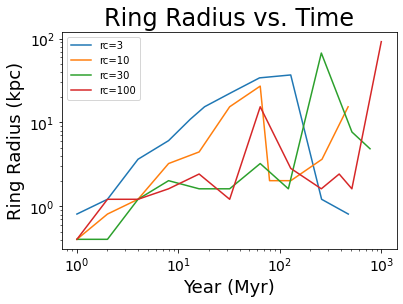

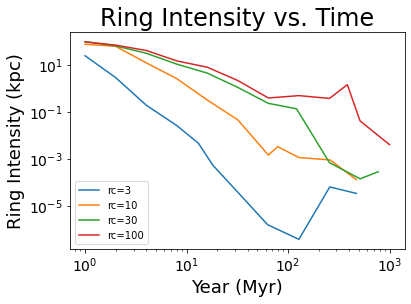

In [9]:

   
        
for i in range(len(ring_r_mlst)):
    
    #plt.scatter(ring_t_mlst[i], ring_r_mlst[i], label = "rc={}".format(rc[i]), edgecolors = 'k')
    plt.plot(ring_t_mlst[i], ring_r_mlst[i], label = "rc={}".format(rc[i]))
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Year (Myr)", fontsize=18)
    plt.xticks(fontsize=14)
    plt.ylabel("Ring Radius (kpc)", fontsize=18)
    plt.yticks(fontsize=14)
    plt.title("Ring Radius vs. Time", fontsize=24)
    # plt.set_cmap("viridis") 
    # cb = plt.colorbar()
    # cb.set_label(label = "Intensity", weight='bold')        
    
plt.legend()
plt.show()

for i in range(len(ring_r_mlst)):
    
    #plt.scatter(ring_t_mlst[i], ring_r_mlst[i], label = "rc={}".format(rc[i]), edgecolors = 'k')
    plt.plot(ring_t_mlst[i], ring_I_mlst[i], label = "rc={}".format(rc[i]))
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Year (Myr)", fontsize=18)
    plt.xticks(fontsize=14)
    plt.ylabel("Ring Intensity", fontsize=18)
    plt.yticks(fontsize=14)
    plt.title("Ring Intensity vs. Time", fontsize=24)
    # plt.set_cmap("viridis") 
    # cb = plt.colorbar()
    # cb.set_label(label = "Intensity", weight='bold')        
    
plt.legend()
plt.show()
